In [ ]:
from google.colab import files
uploaded = files.upload()




In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
 import pandas as pd
data = pd.read_excel("online_retail_modified_2.xlsx")



In [ ]:
!pip install openpyxl  # if not already installed


import numpy as np


In [ ]:
df=pd.DataFrame(data)


In [ ]:
import pandas as pd

# Ensure date column is datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Get the last date in the dataset
max_date = df['InvoiceDate'].max()

# Define churn cutoff (e.g., 3 months before last date)
churn_threshold = max_date - pd.DateOffset(months=3)

# Find last purchase date per customer
last_purchase = df.groupby('CustomerID')['InvoiceDate'].max().reset_index()

# Mark churn = 1 if last purchase was before the threshold
last_purchase['Churn'] = (last_purchase['InvoiceDate'] < churn_threshold).astype(int)

# Merge churn info back into the original dataframe
df = df.merge(last_purchase[['CustomerID', 'Churn']], on='CustomerID', how='left')

# Optional: Check distribution
print(df['Churn'].value_counts())


In [ ]:
df = df.drop(columns=['Description'])


In [ ]:
df.head()        # See the first few rows
df.info()        # Overview of data types and missing values
df.describe()    # Summary statistics for numerical columns


In [ ]:
# Check missing values
df.isnull().sum()



In [ ]:
# Fill missing CustomerID with -1 (as a placeholder)
df['CustomerID'].fillna(-1, inplace=True)


In [ ]:
df.info()

In [ ]:
df.isnull().sum()

In [ ]:
df.duplicated().sum()

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
 #for finding outlayers
 #assigning numerical columns to a variable
num_columns = df.select_dtypes(include='number')
num_columns


In [ ]:
#detecting outlayers
sns.boxplot(data=df)

In [ ]:
#to view outlayers for each columns
for i in num_columns.columns:
  sns.boxplot(data=df,x=i)
  plt.show()

In [ ]:
#iqr method
def outliers(df):
    for col in df.select_dtypes(include=['float64', 'int64']).columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower = Q1 - 1.5 * IQR
        upper = Q3 + 1.5 * IQR

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df



In [ ]:
df1=outliers(df)

In [ ]:
sns.boxplot(data=df1)

In [ ]:
for i in num_columns.columns:
  sns.boxplot(data=df1,x=i)
  plt.show()

In [ ]:
#to make yes or no to numerical values
from sklearn.preprocessing import LabelEncoder

In [ ]:
le=LabelEncoder()

In [ ]:
df1['Churn']=le.fit_transform(df1['Churn'])

In [ ]:
df1['Is_Return']=le.fit_transform(df1['Is_Return'])

In [ ]:
df1['Is_UK']=le.fit_transform(df1['Is_UK'])

In [ ]:
df1.head(5)

In [ ]:
#converting country into numerical
le = LabelEncoder()
df['Country'] = le.fit_transform(df['Country'])  # example


In [ ]:
print(le.classes_[32])

In [ ]:
#converting weekday into numerical
weekday_map = {
    'Monday': 0,
    'Tuesday': 1,
    'Wednesday': 2,
    'Thursday': 3,
    'Friday': 4,
    'Saturday': 5,
    'Sunday': 6
}

df['Weekday'] = df['Weekday'].map(weekday_map)


In [ ]:
df1.head(5)

In [ ]:
#Checking skewness
X=df1.drop('Churn',axis=1)
Y=df1['Churn']

In [ ]:
X = df.select_dtypes(include=['float64', 'int64'])  # Only real numeric columns
print(X.skew())


In [ ]:
from sklearn.preprocessing import PowerTransformer

In [ ]:
pt=PowerTransformer('yeo-johnson')

In [ ]:
numerical_col = df1.select_dtypes(include='number').columns

In [ ]:
df1[numerical_col]=pt.fit_transform(df1[numerical_col])
print(df1[numerical_col].skew())

Quantity       -0.650997
UnitPrice      -0.016257
CustomerID     -0.040299
Country         6.257350
TotalPrice     -0.310891
InvoiceMonth   -0.080255
InvoiceDay     -0.031625
InvoiceHour     0.004670
Weekday         0.006960
Is_Return       6.627434
Is_UK          -2.908026
Churn           1.181445
dtype: float64


In [ ]:
#removing churn from the data X
X = df.select_dtypes(include=['number']).copy()
X = X.drop(columns=['CustomerID', 'Churn'], errors='ignore')


In [ ]:
numerical_col = X.columns


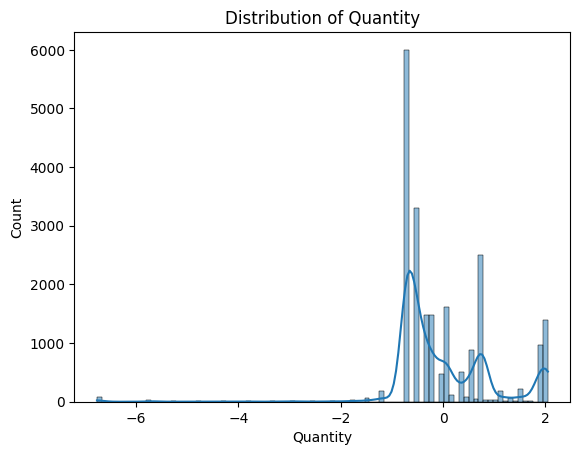

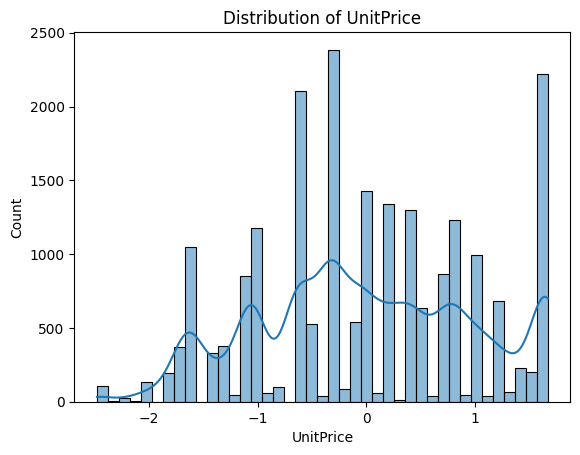

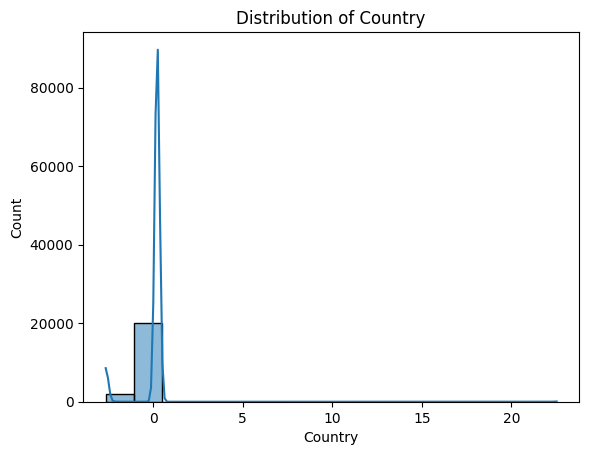

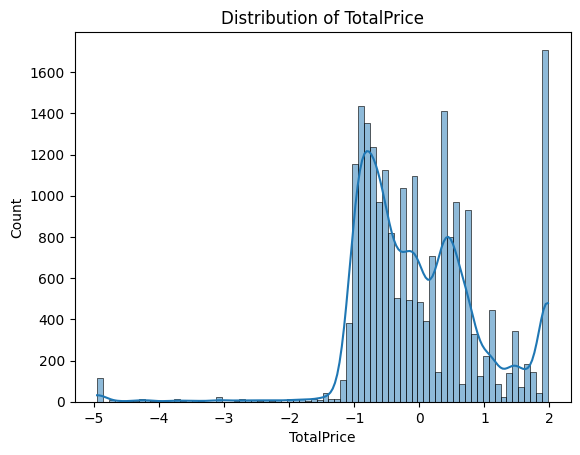

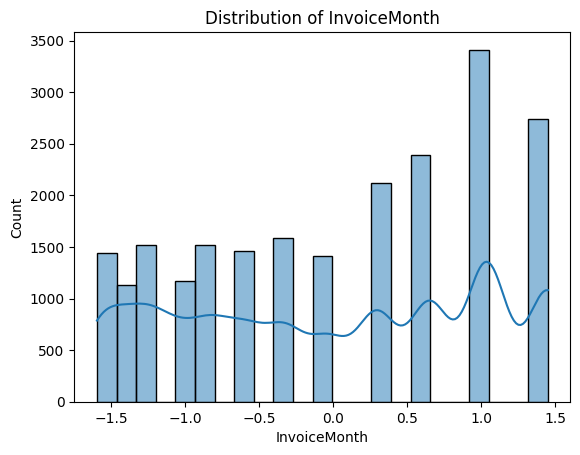

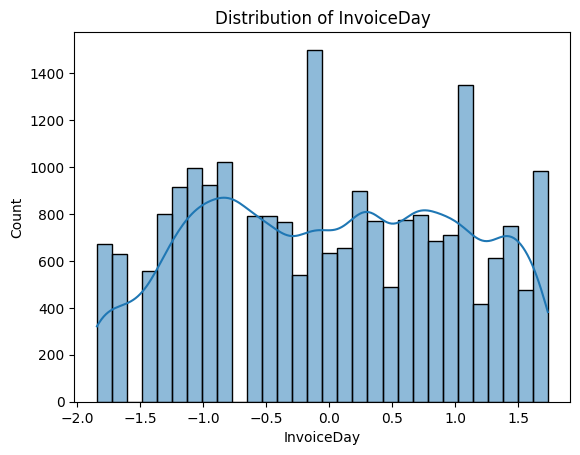

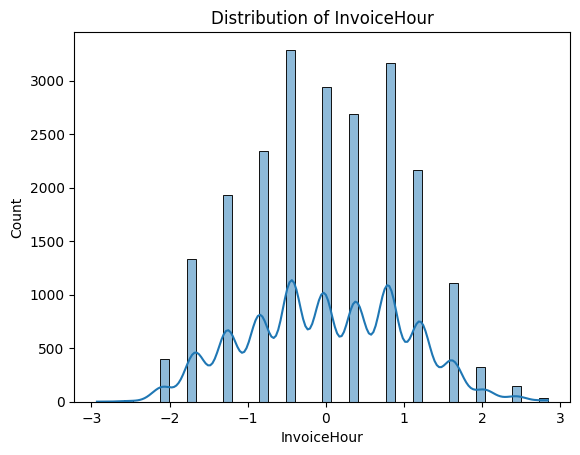

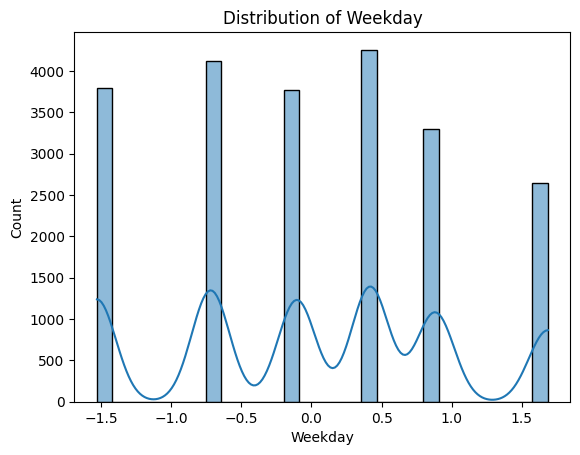

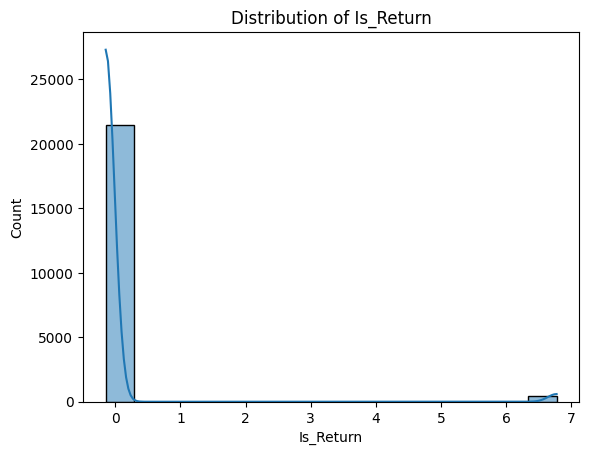

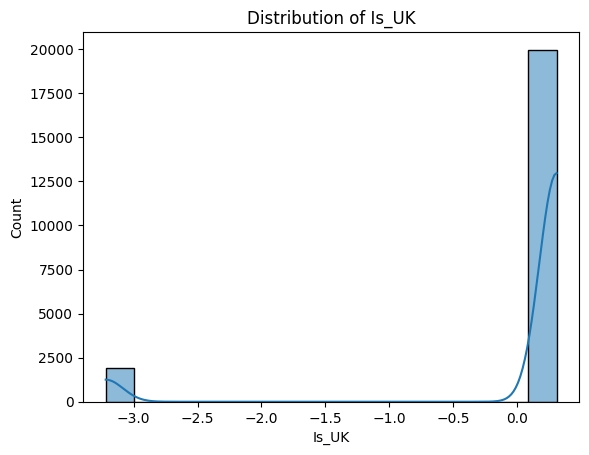

In [ ]:
 for i in numerical_col:
  sns.histplot(data=X,x=i,kde=True)
  plt.title(f"Distribution of {i}")
  plt.show()

In [ ]:
cor = df1.select_dtypes(include=['number']).corr()
print(cor)

              Quantity  UnitPrice  CustomerID   Country  TotalPrice  \
Quantity      1.000000  -0.346282    0.180417 -0.143952    0.649112   
UnitPrice    -0.346282   1.000000   -0.159057  0.000815    0.230415   
CustomerID    0.180417  -0.159057    1.000000  0.070474    0.076428   
Country      -0.143952   0.000815    0.070474  1.000000   -0.159409   
TotalPrice    0.649112   0.230415    0.076428 -0.159409    1.000000   
InvoiceMonth -0.014708  -0.008040    0.014729  0.006719   -0.013509   
InvoiceDay    0.011204  -0.012028    0.007817 -0.000453    0.001015   
InvoiceHour  -0.170137   0.034170   -0.183791  0.118193   -0.172424   
Weekday       0.004713  -0.038446    0.127696 -0.001846   -0.007514   
Is_Return    -0.408705   0.004167    0.003489 -0.019584   -0.431540   
Is_UK        -0.177534   0.008669    0.100716  0.754935   -0.190745   
Churn        -0.295548   0.193683   -0.804045  0.134395   -0.174380   

              InvoiceMonth  InvoiceDay  InvoiceHour   Weekday  Is_Return  \


<Axes: >

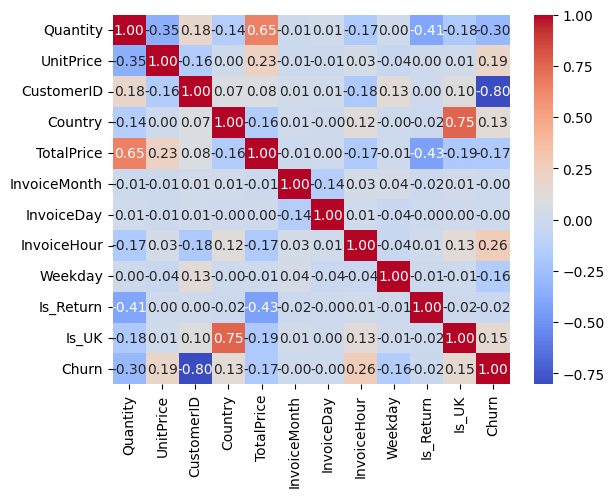

In [ ]:
sns.heatmap(cor,annot=True,cmap='coolwarm',fmt='.2f')
